# Gradient Descent Examples

The codes below illustrate various algorithms introduced in the course: gradient descent with fixed step, with variable step, with optimal step, etc. 

Experiment with the code by changing the objective function, the number of iteration, the tolerance, the step size, etc. Try to understand how the visualization is done using the contour function. 

You may use parts of this code as a starting point for the case where a line-search procedure is used instead of a fixed descent step. 

[[1. 0.]
 [0. 2.]]
Eigenvalues of A:  [1. 2.]
Maximal step for GD:  1.0
Optimal step for GD:  0.6666666666666666
Initial value: 0.625


<IPython.core.display.Javascript object>


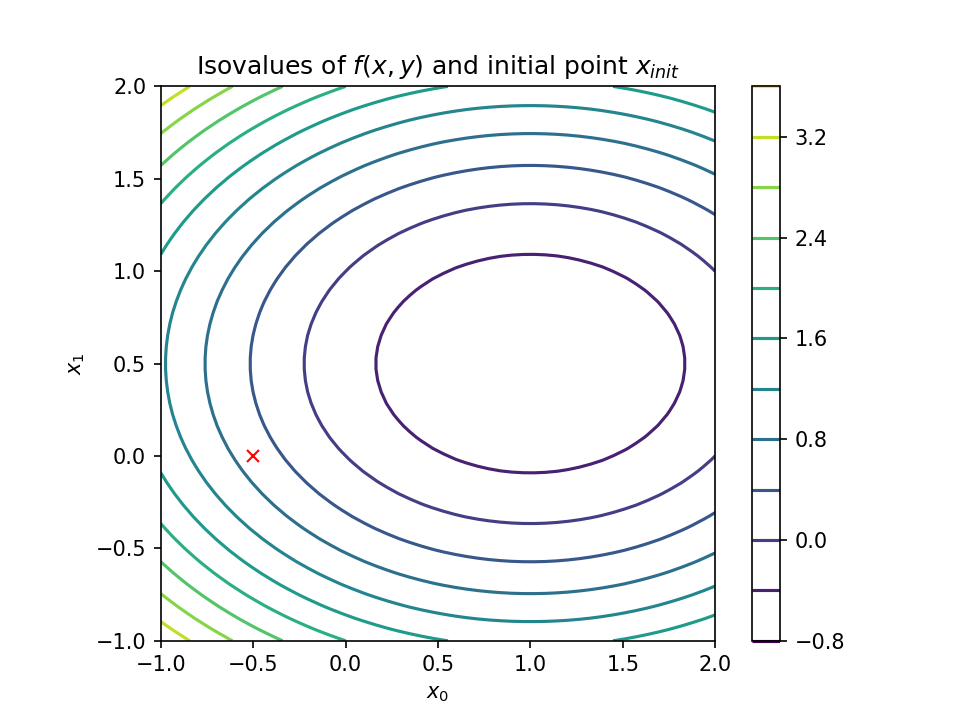

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

A = np.array([[1.0,0],[0,2]])
print(A)

ev = np.linalg.eig(A)[0]
print("Eigenvalues of A: ",ev)

maxstep = 2/np.max(ev)
optstep = 2/(np.max(ev)+np.min(ev))

print("Maximal step for GD: ",maxstep)
print("Optimal step for GD: ",optstep)

b = np.array([1,1])

x0 = np.array([-0.5,0])

def J(x):
    return 0.5*np.dot(x,A@x)-np.dot(b,x)
def GradJ(x):
    return A@x-b

print("Initial value:",J(x0))

Tol = 1e-6
plt.figure(dpi=150)
xmin=-1
xmax=2
ymin=-1
ymax=2
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $f(x,y)$ and initial point $x_{init}$')
plt.show()


Has the algorithm converged ? :  True


<IPython.core.display.Javascript object>


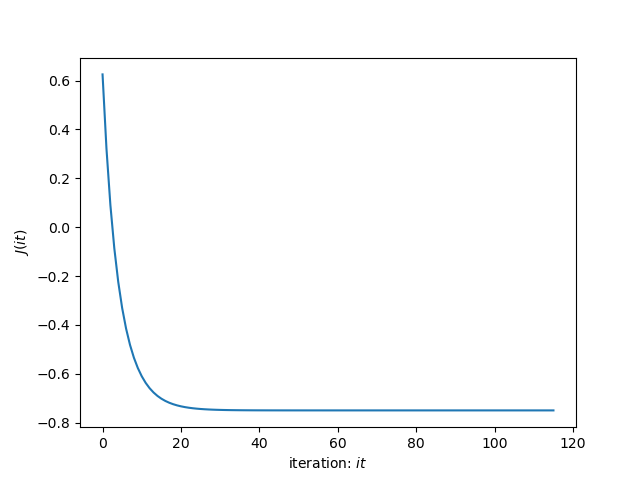

<IPython.core.display.Javascript object>


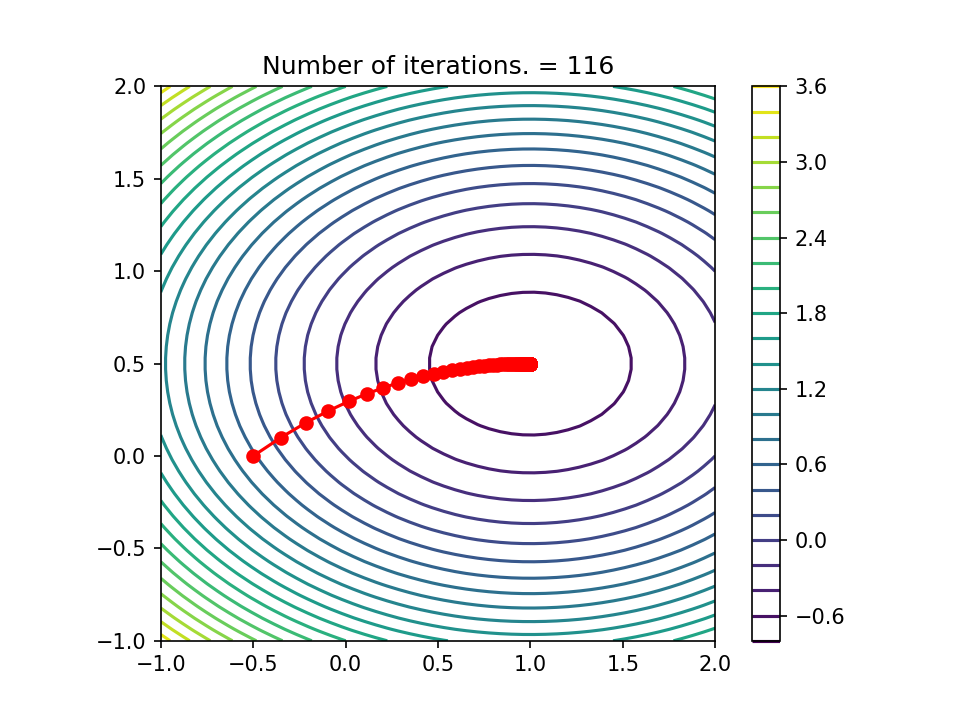

In [2]:
def gradientFixedStep(f,df,x_init,step=1e-01,tol=1e-06,maxiter=200):
    # initialization
    x=x_init.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x))
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.linalg.norm(xtab[-1]-xtab[-2]))>tol):
        it=it+1
        g = df(x)
        # line-search 
        x=x-step*g
        xtab.append(x)
        ftab.append(f(x))
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv
xtab,ftab,conv = gradientFixedStep(J,GradJ,x0)
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

plt.figure(dpi=150)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)

lx0=[X[0] for X in xtab]
lx1=[X[1] for X in xtab]
plt.plot(lx0,lx1,"-ro")
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.axis('scaled')
plt.colorbar()
#plt.savefig('FixedStep001.png',dpi=300)

plt.show()

Has the algorithm converged ? :  False


<IPython.core.display.Javascript object>


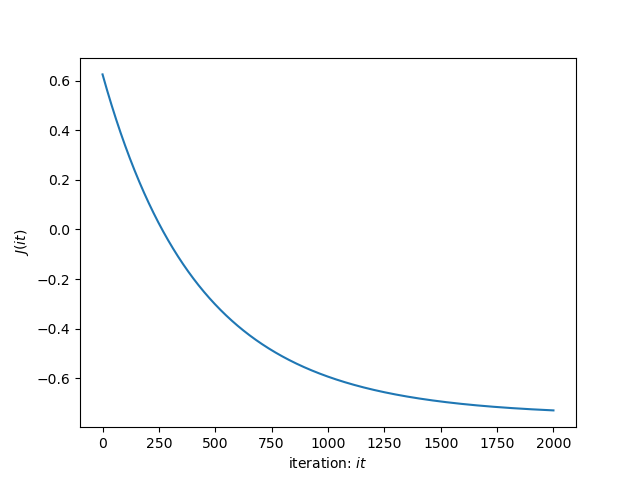

<IPython.core.display.Javascript object>


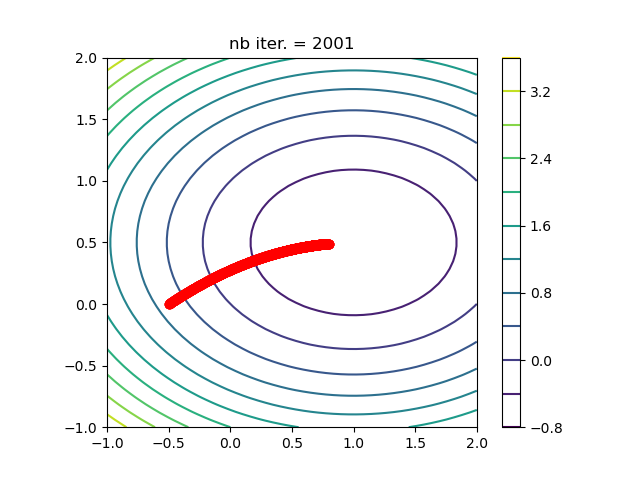

In [3]:
# try maxstep, optstep
xtab2,ftab2,conv = gradientFixedStep(J,GradJ,x0,step=1e-3,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab2)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

plt.figure(dpi=100)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab2]
lx1=[X[1] for X in xtab2]
plt.plot(lx0,lx1,"-ro")

plt.axis('scaled')
plt.title('nb iter. = '+str(np.shape(lx0)[0]))
plt.colorbar()
#plt.savefig('FixedStep00001.png',dpi=300)


plt.show()

<IPython.core.display.Javascript object>


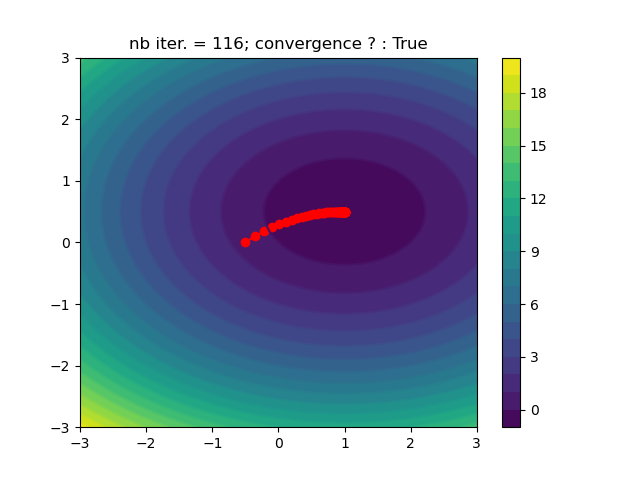

interactive(children=(FloatSlider(value=0.1, description='pas du grad', max=1.0, min=0.001, step=0.001), Outpu…

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
lx0=x0[0]
lx1=x0[1]
line, = ax.plot(lx0,lx1,"-ro")
aX0=np.linspace(-3,3)
aX1=np.linspace(-3,3)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
CF=ax.contourf(aX0,aX1,Z,20)
CB=ax.contour(aX0,aX1,Z,20)
plt.colorbar(CF)
fig.suptitle('')

def update(w):
    xtabm,ftabm,conv = gradientFixedStep(J,GradJ,x0,step=w,maxiter=2000)
    lx0=[X[0] for X in xtabm]
    lx1=[X[1] for X in xtabm]
    line.set_xdata(lx0)
    line.set_ydata(lx1)
    ax.set_title('nb iter. = '+str(np.shape(lx0)[0])+'; convergence ? : '+str(conv))
    fig.canvas.draw()

interact(update,w=widgets.FloatSlider(min=0.001, max=maxstep, step=.001, value=0.1, description='pas du grad'));

Has the algorithm converged ? :  True


<IPython.core.display.Javascript object>


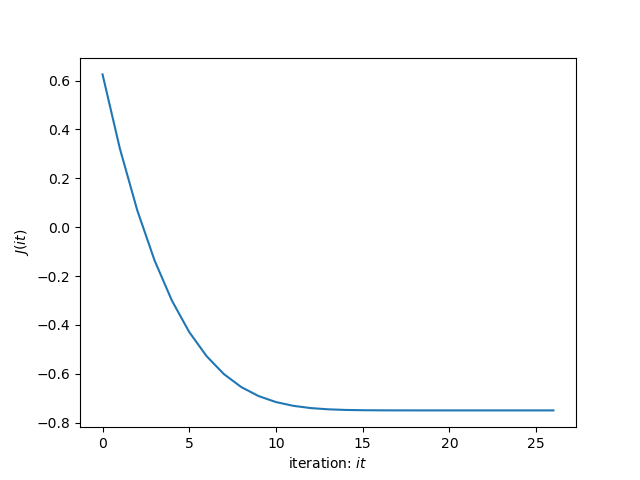

<IPython.core.display.Javascript object>


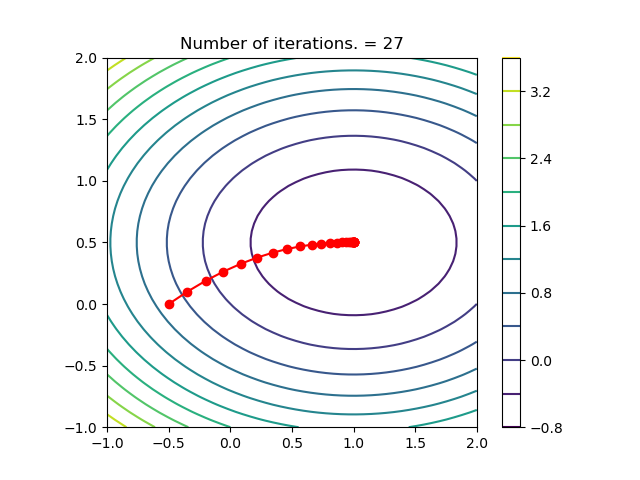

In [5]:
def gradientVariableStep(f,df,x_init,step=0.1,tol=1e-06,maxiter=200):
    # initialization
    maxstep = 10
    x=x_init.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    pval = f(x)
    ftab.append(pval)
    it=0 # iteration count
    g=df(x)
    while((it==0) or (step>tol and it<maxiter and np.linalg.norm(xtab[-1]-xtab[-2]))>tol):  
        #linesearch... this gives you the step
        actx= x-step*g
        val = f(actx)
        if(val<pval):
            #accept iteration
            x = actx
            pval = val
            step = min(1.1*step,maxstep)
            xtab.append(x)
            ftab.append(val)
            g = df(x)
            it=it+1
        else:
            #refuse iteration
            step = 0.8*step
            
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv
xtab3,ftab3,conv = gradientVariableStep(J,GradJ,x0,step=0.1,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab3)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab3]
lx1=[X[1] for X in xtab3]
plt.plot(lx0,lx1,"-ro")

plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()
#plt.savefig('VariableStep.png',dpi=300)


plt.show()

Has the algorithm converged ? :  True
[0.99968523 0.50023608]


<IPython.core.display.Javascript object>


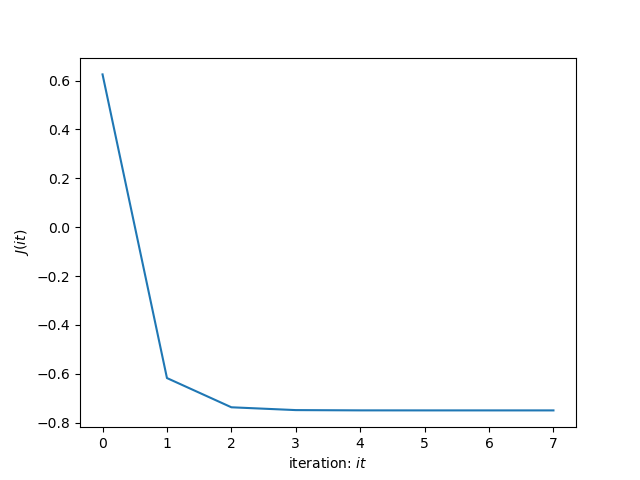

<IPython.core.display.Javascript object>


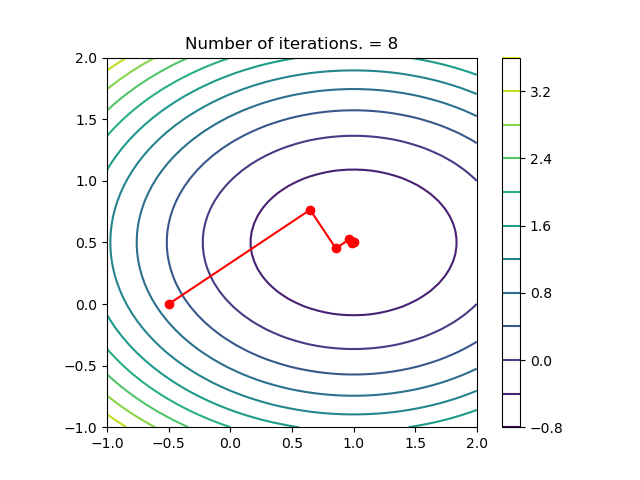

In [6]:
def gradientOptimalStep(f,df,A,x0,tol=1e-08,maxiter=200):
    # initialization
    x=x0.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list of points
    ftab.append(f(x))
    it=0 # iteration
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        g = df(x)
        opt_step = np.dot(g,g)/np.dot(g,A@g)
        x=x-opt_step*g
        xtab.append(x)
        ftab.append(f(x))
        it=it+1
    # booléen pour indiquer la convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv
xtab4,ftab4,conv = gradientOptimalStep(J,GradJ,A,x0,Tol,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
print(xtab4[-1])
plt.figure()
plt.plot(ftab4)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab4]
lx1=[X[1] for X in xtab4]
plt.plot(lx0,lx1,"-ro")

plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()
#plt.savefig('VariableStep.png',dpi=300)


plt.show()

Has the algorithm converged ? :  True
[0.99968523 0.50023608]


<IPython.core.display.Javascript object>


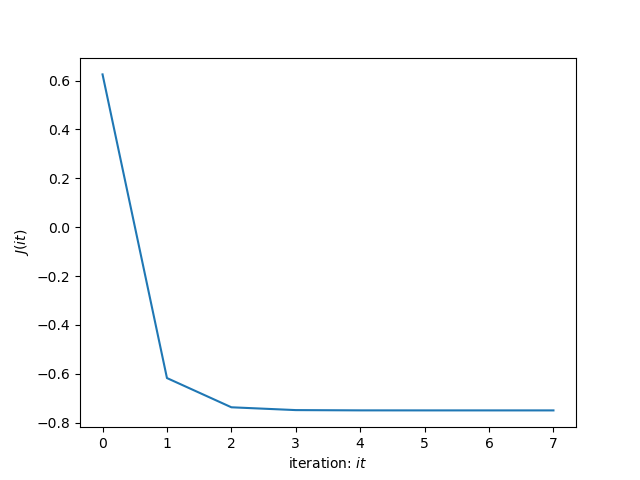

In [7]:
def ConjugateGradient(f,df,A,x0,tol=1e-08,maxiter=200):
    # initialization
    x=x0.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list of points
    ftab.append(f(x))
    it=0 # iteration
    g = df(x)
    d = -g
    n = A.shape[0]
    print(n)
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        opt_step = np.dot(df(x),df(x))/(np.dot(df(x),A@df(x)))
        x=x-opt_step*df(x)
        xtab.append(x)
        ftab.append(f(x))
        it=it+1
    # booléen pour indiquer la convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

xtab5,ftab4,conv = gradientOptimalStep(J,GradJ,A,x0,Tol,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
print(xtab4[-1])
plt.figure()
plt.plot(ftab4)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()